In [1]:
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings
import pandas_ta as ta
import numpy as np
from tqdm import tqdm
import numpy as np
from datetime import datetime

warnings.filterwarnings('ignore')

In [2]:
import os
import sys
import pandas as pd
sys.path.append("..")
from function import cryptopen

In [3]:
path = "../../btc_usd_1d.pkl"
df = cryptopen.cryptopen(path)
df

,Open,High,Low,Close,Volume
Datetime,,,,,
2017-01-01,966.34,1005.00,960.53,998.80,6.579904e+06
2017-01-02,997.75,1032.00,990.01,1014.10,8.190255e+06
2017-01-03,1011.44,1039.00,999.99,1036.99,8.955193e+06
2017-01-04,1035.51,1139.89,1028.56,1122.56,2.325716e+07
2017-01-05,1114.38,1136.72,885.41,994.02,3.503690e+07
...,...,...,...,...,...
2022-05-12,29077.90,30257.00,26631.00,29020.70,9.644756e+05
2022-05-13,29020.80,31072.60,28730.40,29274.30,5.076201e+05
2022-05-14,29274.20,30352.20,28602.30,30079.80,3.157569e+05


In [4]:
adx = df.ta.adx()
macd = df.ta.macd(fast=14, slow=24)
rsi = df.ta.rsi()
df = pd.concat([df, adx, macd, rsi], axis=1)
df

,Open,High,Low,Close,Volume,ADX_14,DMP_14,DMN_14,MACD_14_24_9,MACDh_14_24_9,MACDs_14_24_9,RSI_14
Datetime,,,,,,,,,,,,
2017-01-01,966.34,1005.00,960.53,998.80,6.579904e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-02,997.75,1032.00,990.01,1014.10,8.190255e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,1011.44,1039.00,999.99,1036.99,8.955193e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,1035.51,1139.89,1028.56,1122.56,2.325716e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,1114.38,1136.72,885.41,994.02,3.503690e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-12,29077.90,30257.00,26631.00,29020.70,9.644756e+05,39.118388,6.284914,34.583110,-1976.021249,-604.372597,-1371.648652,25.587567
2022-05-13,29020.80,31072.60,28730.40,29274.30,5.076201e+05,40.530964,8.311274,32.127431,-2075.730249,-563.265278,-1512.464971,26.798228
2022-05-14,29274.20,30352.20,28602.30,30079.80,3.157569e+05,41.872698,7.862095,30.786747,-2090.130436,-462.132372,-1627.998064,30.657265


In [5]:
predict_df = df
predict_df['target'] = predict_df['Close'].shift(-1)
predict_df = predict_df[:-1]

In [6]:
#결측치 처리
predict_df2 = predict_df.dropna(axis=1, how='all')
predict_df3 = predict_df2.interpolate(method='values')
predict_df4 = predict_df3.dropna(axis=0, how='any')
predict_df5 = predict_df4.drop(['High', 'Low'], axis=1)

In [7]:
predict_df5

,Open,Close,Volume,ADX_14,DMP_14,DMN_14,MACD_14_24_9,MACDh_14_24_9,MACDs_14_24_9,RSI_14,target
Datetime,,,,,,,,,,,
2017-02-01,963.99,983.36,6.669710e+06,10.880661,30.906320,16.703404,5.558297,7.080748,-1.522451,63.112736,1008.18
2017-02-02,983.79,1008.18,8.158190e+06,13.368655,33.563232,15.365609,9.490826,8.810621,0.680204,66.642607,1012.64
2017-02-03,1009.15,1012.64,1.089936e+07,15.848354,33.362425,14.230577,12.762993,9.666231,3.096762,67.249096,1034.44
2017-02-04,1015.06,1034.44,5.857359e+06,18.550452,35.035841,13.057720,16.398528,10.641413,5.757115,70.109761,1014.57
2017-02-05,1033.72,1014.57,4.387548e+06,20.961909,32.867653,12.249645,18.062611,9.844397,8.218215,64.573412,1023.70
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-11,31002.10,29074.70,1.101876e+06,36.801119,7.060741,35.379679,-1807.569877,-587.014374,-1220.555502,25.671516,29020.70
2022-05-12,29077.90,29020.70,9.644756e+05,39.118388,6.284914,34.583110,-1976.021249,-604.372597,-1371.648652,25.587567,29274.30
2022-05-13,29020.80,29274.30,5.076201e+05,40.530964,8.311274,32.127431,-2075.730249,-563.265278,-1512.464971,26.798228,30079.80


In [8]:
from sklearn.model_selection import train_test_split
col_dict = predict_df5.columns

data = predict_df5[col_dict[:-1]]
target = predict_df5['target']
x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.2, shuffle=False)

model = LinearRegression()
LR = model.fit(x_train, y_train)
y_pred = model.predict(x_valid)

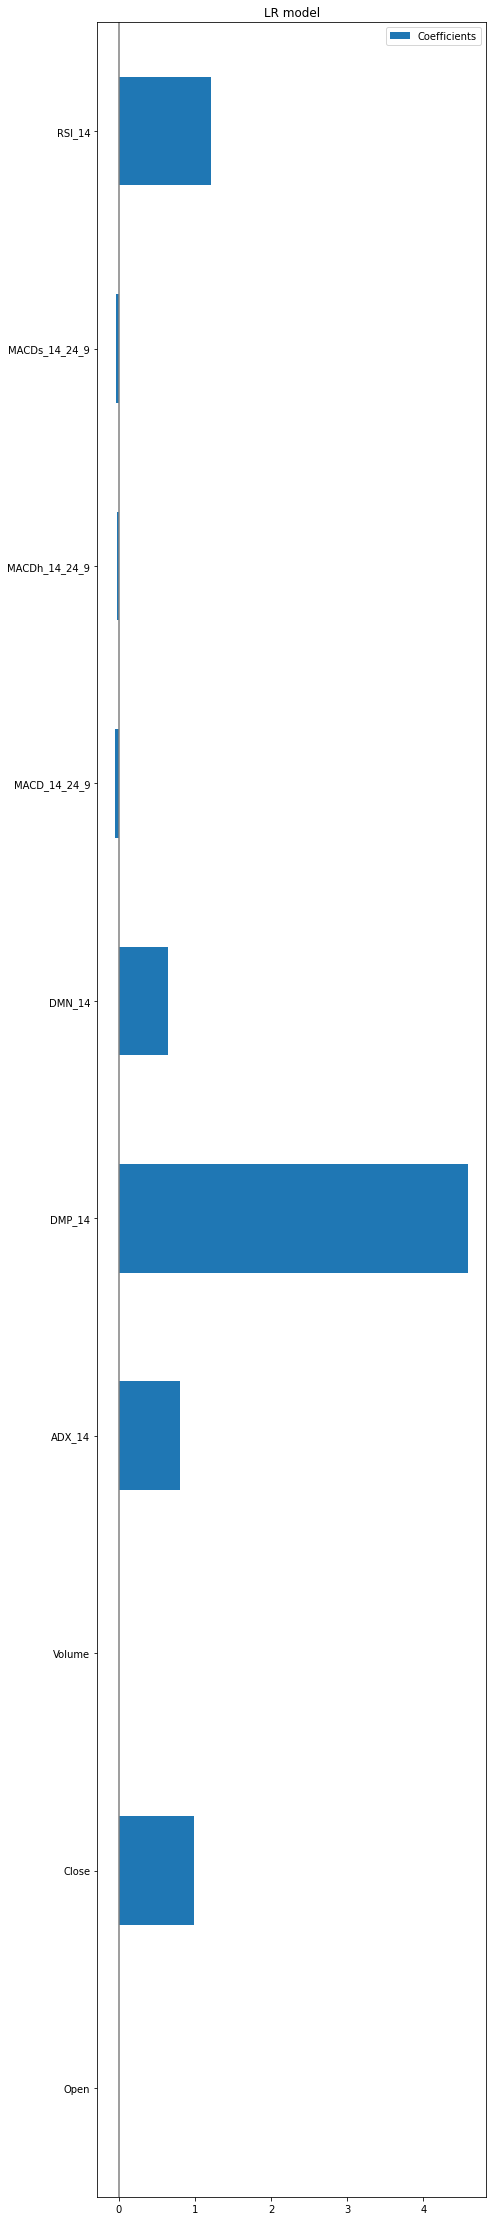

In [9]:
coefs = pd.DataFrame(
   model.coef_,
   columns=['Coefficients'], index=x_train.columns
)

coefs.plot(kind='barh', figsize=(9, 40))
plt.title('LR model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [10]:
from datetime import datetime

import numpy as np


def create_csv_using_only_model(result_df, model_name):
    """
    100일 통합 결과
    Args:
        result_df: df - 백테스트 완료 테이블
        model_name: LR
    Returns:
        csv 파일
    """
    df = result_df.copy()

    df["partition"] = ""
    df["partition"] = np.where((df["Datetime"] >= datetime(year=2021, month=5, day=10)) & (df["Datetime"] <= datetime(year=2021, month=7, day=21)), "loss1", df["partition"])
    df["partition"] = np.where((df["Datetime"] >= datetime(year=2021, month=11, day=18)) & (df["Datetime"] <= datetime(year=2022, month=2, day=6)), "loss2", df["partition"])
    df["partition"] = np.where((df["Datetime"] >= datetime(year=2019, month=2, day=17)) & (df["Datetime"] <= datetime(year=2019, month=7, day=15)), "profit1", df["partition"])
    df["partition"] = np.where((df["Datetime"] >= datetime(year=2020, month=10, day=8)) & (df["Datetime"] <= datetime(year=2021, month=4, day=17)), "profit2", df["partition"])

    condition = "ma"
    temp_df = backtest_ma(df)[["ror", "cr", "mdd", "rate"]]
    df[f"{condition}+return_of_rate"] = temp_df["ror"]
    df[f"{condition}+cumulative_return_of_rate"] = temp_df["cr"]
    df[f"{condition}+mdd"] = temp_df["mdd"]
    df[f"{condition}+rate"] = temp_df["rate"]

    condition = "rsi"
    temp_df = backtest_rsi(df)[["ror", "cr", "mdd", "rate"]]
    df[f"{condition}+return_of_rate"] = temp_df["ror"]
    df[f"{condition}+cumulative_return_of_rate"] = temp_df["cr"]
    df[f"{condition}+mdd"] = temp_df["mdd"]
    df[f"{condition}+rate"] = temp_df["rate"]

    condition = "noise"
    temp_df = backtest_noise(df)[["ror", "cr", "mdd", "rate"]]
    df[f"{condition}+return_of_rate"] = temp_df["ror"]
    df[f"{condition}+cumulative_return_of_rate"] = temp_df["cr"]
    df[f"{condition}+mdd"] = temp_df["mdd"]
    df[f"{condition}+rate"] = temp_df["rate"]

    condition = "ma_noise"
    temp_df = backtest_ma_and_noise(df)[["ror", "cr", "mdd", "rate"]]
    df[f"{condition}+return_of_rate"] = temp_df["ror"]
    df[f"{condition}+cumulative_return_of_rate"] = temp_df["cr"]
    df[f"{condition}+mdd"] = temp_df["mdd"]
    df[f"{condition}+rate"] = temp_df["rate"]

    condition = "ma_rsi"
    temp_df = backtest_ma_and_rsi(df)[["ror", "cr", "mdd", "rate"]]
    df[f"{condition}+return_of_rate"] = temp_df["ror"]
    df[f"{condition}+cumulative_return_of_rate"] = temp_df["cr"]
    df[f"{condition}+mdd"] = temp_df["mdd"]
    df[f"{condition}+rate"] = temp_df["rate"]

    condition = "rsi_noise"
    temp_df = backtest_noise_and_rsi(df)[["ror", "cr", "mdd", "rate"]]
    df[f"{condition}+return_of_rate"] = temp_df["ror"]
    df[f"{condition}+cumulative_return_of_rate"] = temp_df["cr"]
    df[f"{condition}+mdd"] = temp_df["mdd"]
    df[f"{condition}+rate"] = temp_df["rate"]

    condition = "ma_rsi_noise"
    temp_df = backtest_ma_and_rsi_and_noise(df)[["ror", "cr", "mdd", "rate"]]
    df[f"{condition}+return_of_rate"] = temp_df["ror"]
    df[f"{condition}+cumulative_return_of_rate"] = temp_df["cr"]
    df[f"{condition}+mdd"] = temp_df["mdd"]
    df[f"{condition}+rate"] = temp_df["rate"]

    df.rename(columns={"ror": "return of rate", "cr": "cumulative return of rate"}, inplace=True)
    file_name = f"only_{model_name}.csv"
    df.to_csv(file_name)

    return df

def create_csv_using_only_best_model(result_df, model_name, fitting_term):
    """
    최고 성능 모델
    Args:
        result_df: df - 백테스트 완료 테이블
        model_name: arima
        fitting_term: 100 - 학습 일 수
    Returns:
        csv 파일
    """
    df = result_df.copy()
    df["partition"] = ""
    df["partition"] = np.where((df["Datetime"] >= datetime(year=2021, month=5, day=10)) & (df["Datetime"] <= datetime(year=2021, month=7, day=21)), "loss1", df["partition"])
    df["partition"] = np.where((df["Datetime"] >= datetime(year=2021, month=11, day=18)) & (df["Datetime"] <= datetime(year=2022, month=2, day=6)), "loss2", df["partition"])
    df["partition"] = np.where((df["Datetime"] >= datetime(year=2019, month=2, day=17)) & (df["Datetime"] <= datetime(year=2019, month=7, day=15)), "profit1", df["partition"])
    df["partition"] = np.where((df["Datetime"] >= datetime(year=2020, month=10, day=8)) & (df["Datetime"] <= datetime(year=2021, month=4, day=17)), "profit2", df["partition"])

    condition = "ma"
    temp_df = backtest_ma(df)[["ror", "cr", "mdd", "rate"]]
    df[f"{condition}+return_of_rate"] = temp_df["ror"]
    df[f"{condition}+cumulative_return_of_rate"] = temp_df["cr"]
    df[f"{condition}+mdd"] = temp_df["mdd"]
    df[f"{condition}+rate"] = temp_df["rate"]

    condition = "rsi"
    temp_df = backtest_rsi(df)[["ror", "cr", "mdd", "rate"]]
    df[f"{condition}+return_of_rate"] = temp_df["ror"]
    df[f"{condition}+cumulative_return_of_rate"] = temp_df["cr"]
    df[f"{condition}+mdd"] = temp_df["mdd"]
    df[f"{condition}+rate"] = temp_df["rate"]

    condition = "noise"
    temp_df = backtest_noise(df)[["ror", "cr", "mdd", "rate"]]
    df[f"{condition}+return_of_rate"] = temp_df["ror"]
    df[f"{condition}+cumulative_return_of_rate"] = temp_df["cr"]
    df[f"{condition}+mdd"] = temp_df["mdd"]
    df[f"{condition}+rate"] = temp_df["rate"]

    condition = "ma_noise"
    temp_df = backtest_ma_and_noise(df)[["ror", "cr", "mdd", "rate"]]
    df[f"{condition}+return_of_rate"] = temp_df["ror"]
    df[f"{condition}+cumulative_return_of_rate"] = temp_df["cr"]
    df[f"{condition}+mdd"] = temp_df["mdd"]
    df[f"{condition}+rate"] = temp_df["rate"]

    condition = "ma_rsi"
    temp_df = backtest_ma_and_rsi(df)[["ror", "cr", "mdd", "rate"]]
    df[f"{condition}+return_of_rate"] = temp_df["ror"]
    df[f"{condition}+cumulative_return_of_rate"] = temp_df["cr"]
    df[f"{condition}+mdd"] = temp_df["mdd"]
    df[f"{condition}+rate"] = temp_df["rate"]

    condition = "rsi_noise"
    temp_df = backtest_noise_and_rsi(df)[["ror", "cr", "mdd", "rate"]]
    df[f"{condition}+return_of_rate"] = temp_df["ror"]
    df[f"{condition}+cumulative_return_of_rate"] = temp_df["cr"]
    df[f"{condition}+mdd"] = temp_df["mdd"]
    df[f"{condition}+rate"] = temp_df["rate"]

    condition = "ma_rsi_noise"
    temp_df = backtest_ma_and_rsi_and_noise(df)[["ror", "cr", "mdd", "rate"]]
    df[f"{condition}+return_of_rate"] = temp_df["ror"]
    df[f"{condition}+cumulative_return_of_rate"] = temp_df["cr"]
    df[f"{condition}+mdd"] = temp_df["mdd"]
    df[f"{condition}+rate"] = temp_df["rate"]
    df.rename(columns={"ror": "return_of_rate", "cr": "cumulative_return_of_rate"}, inplace=True)

    file_name = f"only_best_{model_name}_{fitting_term}.csv"
    df.to_csv(file_name)
    return df


def get_extracted_df_from_total_df(test_df, condition_list=[], partition=None):
    """
    Args:
        test_df:
        condition_list: ["ma"], ["ma", "noise"], ["ma", "noise", "rsi"]
        partition: profit1, profit2, loss1, loss2
    Returns:
        df
    """
    condition = ""

    if len(condition_list) == 0:
        condition = ""

    elif len(condition_list) == 1:
        if "rsi" in condition_list:
            condition = "rsi"
        elif "ma" in condition_list:
            condition = "ma"
        elif "noise" in condition_list:
            condition = "noise"

    elif len(condition_list) == 2:
        if "rsi" in condition_list and "ma" in condition_list:
            condition = "ma_rsi"
        elif "rsi" in condition_list and "noise" in condition_list:
            condition = "rsi_noise"
        elif "noise" in condition_list and "ma" in condition_list:
            condition = "ma_noise"


    elif len(condition_list) == 3:
        condition = "ma_rsi_noise"


    if len(condition):
        columns = ["Datetime", "Close", "partition", "prediction_close", f"{condition}+return_of_rate", f"{condition}+cumulative_return_of_rate", f"{condition}+mdd", f"{condition}+rate" ]
    else:
        columns = ["Datetime", "Close", "partition", "prediction_close", "return_of_rate", "cumulative_return_of_rate", "mdd", "rate" ]

    df = test_df[columns]
    columns = list(map(lambda x:x.split("+")[-1], columns))
    df.columns = columns

    if partition == "profit1":
        df = df[df["partition"] == "profit1"]
    elif partition == "profit2":
        df = df[df["partition"] == "profit2"]
    elif partition == "loss1":
        df = df[df["partition"] == "loss1"]
    elif partition == "loss2":
        df = df[df["partition"] == "loss2"]

    df['cumulative_return_of_rate'] = df['return_of_rate'].cumprod()
    df['mdd'] = (df['cumulative_return_of_rate'].cummax() - df['cumulative_return_of_rate']) / df['cumulative_return_of_rate'].cummax() * 100

    return df


def backtest_ma(test_df):
    df = test_df.copy()
    df['ma5'] = df['Open'].rolling(window=5).mean()
    df['ma10'] = df['Open'].rolling(window=10).mean()
    df['ma20'] = df['Open'].rolling(window=20).mean()
    df['ma50'] = df['Open'].rolling(window=50).mean()
    df['ma100'] = df['Open'].rolling(window=100).mean()

    df['rate'] = 0
    df['rate'] = np.where(df['ma5'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma10'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma20'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma50'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma100'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = df['rate'] / 5

    df['trade'] = np.where((df['Open'] < df['prediction_close']) & (df['rate'] > 0), 1, 0)
    df['ror'] = np.where(df['trade'] == 1, 1 + (df['Close'] / df['Open'] - 1) * df['rate'], 1)
    df['cr'] = df['ror'].cumprod()
    df['mdd'] = (df['cr'].cummax() - df['cr']) / df['cr'].cummax() * 100
    return df


def backtest_noise(test_df):
    noise_ma = 30
    df = test_df.copy()
    df['ma5'] = df['Open'].rolling(window=5).mean()
    df['ma10'] = df['Open'].rolling(window=10).mean()
    df['ma20'] = df['Open'].rolling(window=20).mean()
    df['ma50'] = df['Open'].rolling(window=50).mean()
    df['ma100'] = df['Open'].rolling(window=100).mean()

    df['noise'] = 1 - abs(df['Open'] - df['Close']) / ((df['High']) * (1.0000001) - df['Low'])
    df['noise'] = df['noise'].shift(1)
    df['noise_ma'] = df['noise'].rolling(window=noise_ma).mean()

    df['rate'] = 0
    df['rate'] = np.where(df['noise_ma'] < 0.3, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.4, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.5, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.6, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.7, df['rate'] + 1, df['rate'])
    df['rate'] = df['rate'] / 5

    df['trade'] = np.where((df['Open'] < df['prediction_close']) & (df['rate'] > 0), 1, 0)
    df['ror'] = np.where(df['trade'] == 1, 1 + (df['Close'] / df['Open'] - 1) * df['rate'], 1)
    df['cr'] = df['ror'].cumprod()
    df['mdd'] = (df['cr'].cummax() - df['cr']) / df['cr'].cummax() * 100
    return df


def backtest_rsi(test_df):
    df = test_df.copy()
    df['rate'] = 1
    df['up'] = np.where(df['Close'].diff(1) > 0, df['Close'].diff(1), 0)
    df['down'] = np.where(df['Close'].diff(1) < 0, df['Close'].diff(1) * (-1), 0)
    df['au'] = df['up'].rolling(window=14, min_periods=14).mean()
    df['ad'] = df['down'].rolling(window=14, min_periods=14).mean()
    df['rsi'] = df['au'].div(df['ad'] + df['au']) * 100
    df['rsi_shift_1'] = df['rsi'].shift(1) # 하루 전의 rsi
    df['trade'] = np.where((df['Open'] < df['prediction_close']) & (df['rsi_shift_1'] > 40), 1, 0)
    df['ror'] = np.where(df['trade'] == 1, df['Close'] / df['Open'], 1)
    df['cr'] = df['ror'].cumprod()
    df['mdd'] = (df['cr'].cummax() - df['cr']) / df['cr'].cummax() * 100
    return df


def backtest_ma_and_noise(test_df):
    noise_ma = 30
    df = test_df.copy()
    df['noise'] = 1 - abs(df['Open'] - df['Close']) / ((df['High']) * (1.0000001) - df['Low'])
    df['noise'] = df['noise'].shift(1)
    df['noise_ma'] = df['noise'].rolling(window=noise_ma).mean()

    df['ma5'] = df['Open'].rolling(window=5).mean()
    df['ma10'] = df['Open'].rolling(window=10).mean()
    df['ma20'] = df['Open'].rolling(window=20).mean()
    df['ma50'] = df['Open'].rolling(window=50).mean()
    df['ma100'] = df['Open'].rolling(window=100).mean()

    df['rate'] = 0
    df['rate'] = np.where(df['ma5'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma10'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma20'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma50'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma100'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.3, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.4, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.5, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.6, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.7, df['rate'] + 1, df['rate'])
    df['rate'] = df['rate'] / 10

    df['trade'] = np.where((df['Open'] < df['prediction_close']) & (df['rate'] > 0), 1, 0)
    df['ror'] = np.where(df['trade'] == 1, 1 + (df['Close'] / df['Open'] - 1) * df['rate'], 1)
    df['cr'] = df['ror'].cumprod()
    df['mdd'] = (df['cr'].cummax() - df['cr']) / df['cr'].cummax() * 100
    return df


def backtest_ma_and_rsi(test_df):
    df = test_df.copy()
    df['up'] = np.where(df['Close'].diff(1) > 0, df['Close'].diff(1), 0)
    df['down'] = np.where(df['Close'].diff(1) < 0, df['Close'].diff(1) * (-1), 0)
    df['au'] = df['up'].rolling(window=14, min_periods=14).mean()
    df['ad'] = df['down'].rolling(window=14, min_periods=14).mean()
    df['rsi'] = df['au'].div(df['ad'] + df['au']) * 100
    df['rsi_shift_1'] = df['rsi'].shift(1) # 하루 전의 rsi

    df['ma5'] = df['Open'].rolling(window=5).mean()
    df['ma10'] = df['Open'].rolling(window=10).mean()
    df['ma20'] = df['Open'].rolling(window=20).mean()
    df['ma50'] = df['Open'].rolling(window=50).mean()
    df['ma100'] = df['Open'].rolling(window=100).mean()

    df['rate'] = 0
    df['rate'] = np.where(df['ma5'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma10'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma20'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma50'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma100'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = df['rate'] / 5

    df['trade'] = np.where((df['Open'] < df['prediction_close']) & (df['rate'] > 0) & (df['rsi_shift_1'] > 40), 1, 0)  # rsi가 40이상일 경우에만 거래 진행
    df['ror'] = np.where(df['trade'] == 1, 1 + (df['Close'] / df['Open'] - 1) * df['rate'], 1)
    df['cr'] = df['ror'].cumprod()
    df['mdd'] = (df['cr'].cummax() - df['cr']) / df['cr'].cummax() * 100

    return df


def backtest_noise_and_rsi(test_df):
    df = test_df.copy()
    noise_ma = 30
    df['noise'] = 1 - abs(df['Open'] - df['Close']) / ((df['High']) * (1.0000001) - df['Low'])
    df['noise'] = df['noise'].shift(1)
    df['noise_ma'] = df['noise'].rolling(window=noise_ma).mean()
    df['up'] = np.where(df['Close'].diff(1) > 0, df['Close'].diff(1), 0)
    df['down'] = np.where(df['Close'].diff(1) < 0, df['Close'].diff(1) * (-1), 0)
    df['au'] = df['up'].rolling(window=14, min_periods=14).mean()
    df['ad'] = df['down'].rolling(window=14, min_periods=14).mean()
    df['rsi'] = df['au'].div(df['ad'] + df['au']) * 100
    df['rsi_shift_1'] = df['rsi'].shift(1) # 하루 전의 rsi

    df['rate'] = 0
    df['rate'] = np.where(df['noise_ma'] < 0.3, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.4, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.5, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.6, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.7, df['rate'] + 1, df['rate'])
    df['rate'] = df['rate'] / 5

    df['trade'] = np.where((df['Open'] < df['prediction_close']) & (df['rate'] > 0) & (df['rsi_shift_1'] > 40), 1, 0)  # rsi가 40이상일 경우에만 거래 진행
    df['ror'] = np.where(df['trade'] == 1, 1 + (df['Close'] / df['Open'] - 1) * df['rate'], 1)
    df['cr'] = df['ror'].cumprod()
    df['mdd'] = (df['cr'].cummax() - df['cr']) / df['cr'].cummax() * 100

    return df


def backtest_ma_and_rsi_and_noise(test_df):
    noise_ma = 30
    df = test_df.copy()
    df['up'] = np.where(df['Close'].diff(1) > 0, df['Close'].diff(1), 0)
    df['down'] = np.where(df['Close'].diff(1) < 0, df['Close'].diff(1) * (-1), 0)
    df['au'] = df['up'].rolling(window=14, min_periods=14).mean()
    df['ad'] = df['down'].rolling(window=14, min_periods=14).mean()
    df['rsi'] = df['au'].div(df['ad'] + df['au']) * 100
    df['rsi_shift_1'] = df['rsi'].shift(1) # 하루 전의 rsi

    df['noise'] = 1 - abs(df['Open'] - df['Close']) / ((df['High']) * (1.0000001) - df['Low'])
    df['noise'] = df['noise'].shift(1)
    df['noise_ma'] = df['noise'].rolling(window=noise_ma).mean()
    df['ma5'] = df['Open'].rolling(window=5).mean()
    df['ma10'] = df['Open'].rolling(window=10).mean()
    df['ma20'] = df['Open'].rolling(window=20).mean()
    df['ma50'] = df['Open'].rolling(window=50).mean()
    df['ma100'] = df['Open'].rolling(window=100).mean()

    df['rate'] = 0
    df['rate'] = np.where(df['ma5'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma10'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma20'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma50'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma100'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.3, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.4, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.5, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.6, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.7, df['rate'] + 1, df['rate'])
    df['rate'] = df['rate'] / 10

    df['trade'] = np.where((df['Open'] < df['prediction_close']) & (df['rate'] > 0) & (df['rsi_shift_1'] > 40), 1, 0)  # rsi가 40이상일 경우에만 거래 진행
    df['ror'] = np.where(df['trade'] == 1, 1 + (df['Close'] / df['Open'] - 1) * df['rate'], 1)
    df['cr'] = df['ror'].cumprod()
    df['mdd'] = (df['cr'].cummax() - df['cr']) / df['cr'].cummax() * 100

    return df

In [11]:
diff = np.mean(np.abs(LR.predict(x_valid)-y_valid)/y_valid)
diff

0.029175151963484924

In [12]:
def batch(iterable, batch_size, pt):
    """
    batch row 생성 이터레이터
    Args:
        iterable: iterable datastructure
        batch_size:
        pt: prediction term 예측 기간
    Returns:
        yield: batch row
    """

    l = len(iterable)
    for idx, ndx in tqdm(enumerate(range(0, l, pt))):
        yield idx, iterable[ndx: min(ndx + batch_size, l)]


def backtest_LR_1d(test_df: pd.DataFrame, ft: int, pt: int, plot=True) -> pd.DataFrame:
    """

    Args:
        test_df: 1시간 봉 데이터
        ft: fitting term 피팅 시킬 기간
        pt: prediction term 예측 기간
        arima_params:
    Returns:
        df: 예측 값이 열로 포함된 DataFrame
    """
    df = test_df.copy()
    batch_size = ft + pt
    total_loop = int(len(df) / pt) - 1
    result_columns = list(df.columns)
    result_columns.append("prediction_close")

    result_df = pd.DataFrame(columns=result_columns)

    try:
        for idx, batch_df in batch(df, batch_size, pt):
            # print(f'{idx}/{total_loop} running loop...')
            train, test = batch_df[:ft-1], batch_df[ft-1:ft]
            X_train, y_train = train.drop('target',axis=1,inplace=False),train['target']
            X_test, y_test = test.drop('target',axis=1,inplace=False),test['target']
            LR = LinearRegression()
            LR.fit(X_train, y_train)
            pred = LR.predict(X_test)
            if len(pred) ==0:
                break
            row = batch_df.iloc[[-1]]
            row['prediction_close'] = pred
            row['batch_open'] = batch_df.iloc[ft].Open
            result_df = pd.concat([result_df, row], axis=0)

    except IndexError:
        pass
    result_df['trade'] = np.where(result_df['batch_open'] < result_df['prediction_close'], 1, 0)
    result_df['ror'] = np.where(result_df['trade'] == 1, result_df['Close'] / result_df['batch_open'], 1)
    result_df['cr'] = result_df['ror'].cumprod()
    result_df['mdd'] = (result_df['cr'].cummax() - result_df['cr']) / result_df['cr'].cummax() * 100

    if plot:
        plot_result(result_df)
        plot_return(result_df)

    return result_df

def plot_result(df):
    plt.figure(figsize=(20, 8))
    l=list(df.index)
    for i in range(len(l)):
        l[i]=datetime.strptime(str(l[i])[:10],'%Y-%m-%d')
    plt.plot(l, df['Close'].values, color='b', label='real close')
    plt.plot(l, df['prediction_close'].values , color='r', label='prediction close')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_return(df):
    plt.figure(figsize=(20, 8))
    l=list(df.index)
    for i in range(len(l)):
        l[i]=datetime.strptime(str(l[i])[:10],'%Y-%m-%d')
    plt.plot(l, df['cr'].values , color='r', label='return')
    plt.legend()
    plt.title(
        f"mdd: {round(df['mdd'].max(), 2)}\nreturn_rate: {round(df['cr'].iloc[-1] * 100 - 100, 2)}%")
    plt.grid(True)
    plt.show()

def analysis_return(test_df):
    # ror: 일일 수익률
    # trading_rate: 거래 확률
    # success_rate: 거래 성공 확률
    # pnl_rate: 손익비
    # mdd: 최대 손실 낙폭
    # cr: 누적 수익률

    df = test_df.copy()
    df['success'] = np.where((df['ror'] > 1) & (df['trade'] == 1), 1, 0)
    df['fail'] = np.where((df['ror'] < 1) & (df['trade'] == 1), 1, 0)
    df['success_ror'] = np.where(df['success'], (df['ror'] - 1) * 100, 0)
    df['fail_ror'] = np.where(df['fail'], (1 - df['ror']) * 100, 0)

    trade_rate = df['trade'].sum() / len(df)
    success_rate = df['success'].sum() / df['trade'].sum()
    pnl_rate = df['success_ror'].sum() / df['fail_ror'].sum()
    mdd = df['mdd'].max()
    cr = df['cr'].iloc[-1]

    return_dict = {}
    return_dict['trade_rate'] = f'{trade_rate * 100: .2f}%'
    return_dict['success_rate'] = f'{success_rate * 100: .2f}%'
    return_dict['pnl_rate'] = f'{pnl_rate: .2f}'
    return_dict['mdd'] = f'{mdd: .2f}%'
    return_dict['cr'] = f'{(cr - 1) * 100: .2f}%'

    return return_dict

def get_result_loss_1(test_df):
    df = test_df.copy()
    df = df[(df.index >= "2021-05-10") & (df.index <= "2021-07-21")]
    df['ror'] = np.where(df['trade'] == 1, 1 + (df['Close'] / df['Open'] - 1) * df['rate'], 1)
    df['cr'] = df['ror'].cumprod()
    df['mdd'] = (df['cr'].cummax() - df['cr']) / df['cr'].cummax() * 100
    return analysis_return(df)

def get_result_loss_2(test_df):
    df = test_df.copy()
    df = df[(df.index >= "2021-11-18") & (df.index <= "2022-02-06")]
    df['ror'] = np.where(df['trade'] == 1, 1 + (df['Close'] / df['Open'] - 1) * df['rate'], 1)
    df['cr'] = df['ror'].cumprod()
    df['mdd'] = (df['cr'].cummax() - df['cr']) / df['cr'].cummax() * 100
    return analysis_return(df)

def get_result_profit_1(test_df):
    df = test_df.copy()
    df = df[(df.index >= "2019-02-17") & (df.index <= "2019-07-15")]
    df['ror'] = np.where(df['trade'] == 1, 1 + (df['Close'] / df['Open'] - 1) * df['rate'], 1)
    df['cr'] = df['ror'].cumprod()
    df['mdd'] = (df['cr'].cummax() - df['cr']) / df['cr'].cummax() * 100
    return analysis_return(df)

def get_result_profit_2(test_df):
    df = test_df.copy()
    df = df[(df.index >= "2020-10-08") & (df.index <= "2021-04-17")]
    df['ror'] = np.where(df['trade'] == 1, 1 + (df['Close'] / df['Open'] - 1) * df['rate'], 1)
    df['cr'] = df['ror'].cumprod()
    df['mdd'] = (df['cr'].cummax() - df['cr']) / df['cr'].cummax() * 100
    return analysis_return(df)

1830it [00:40, 44.73it/s]


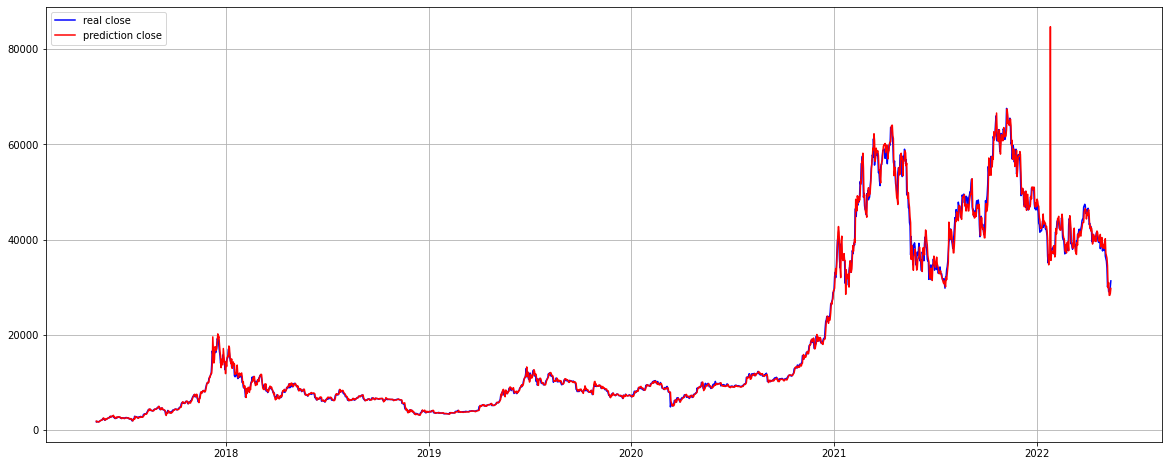

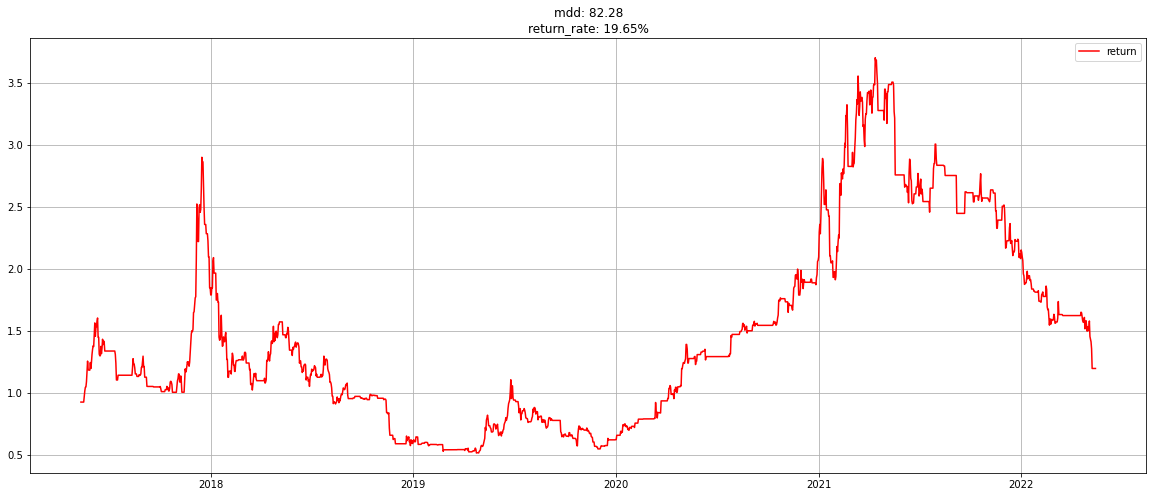

In [18]:
#day50 = backtest_LR_1d(predict_df5, 50, 1, plot=False)
day100 = backtest_LR_1d(predict_df5, 100, 1, plot=True)
#day200 = backtest_LR_1d(predict_df5, 200, 1, plot=False)
#day300 = backtest_LR_1d(predict_df5, 300, 1, plot=False)
#day500 = backtest_LR_1d(predict_df5, 500, 1, plot=False)

In [19]:
print(analysis_return(day100))
#print(analysis_return(day100))
#print(analysis_return(day200))
#print(analysis_return(day300))
#print(analysis_return(day500))

{'trade_rate': ' 52.46%', 'success_rate': ' 52.40%', 'pnl_rate': ' 1.07', 'mdd': ' 82.28%', 'cr': ' 19.65%'}


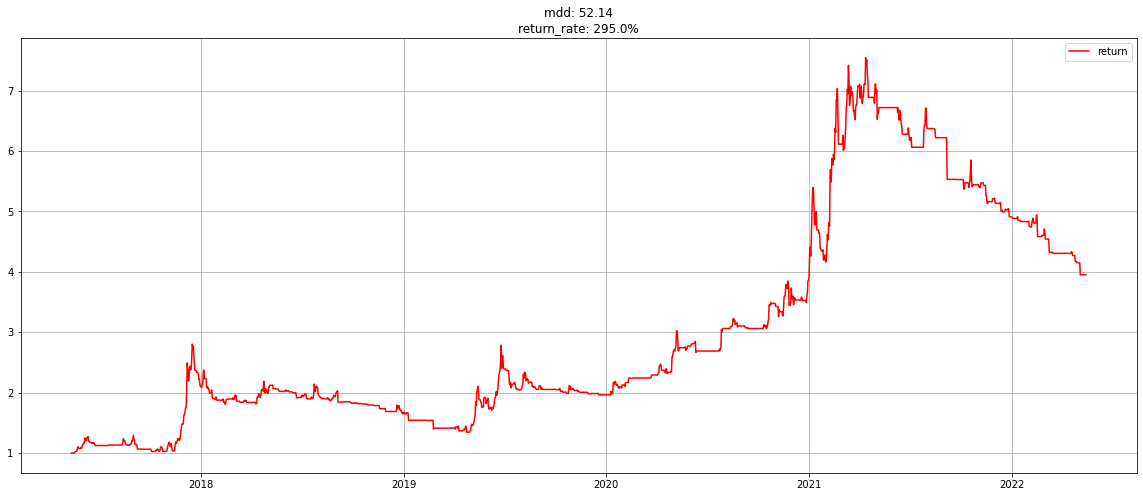

{'trade_rate': ' 17.81%', 'success_rate': ' 30.77%', 'pnl_rate': ' 0.36', 'mdd': ' 9.78%', 'cr': '-9.78%'}
{'trade_rate': ' 33.33%', 'success_rate': ' 40.74%', 'pnl_rate': ' 0.30', 'mdd': ' 9.23%', 'cr': '-9.75%'}
{'trade_rate': ' 56.38%', 'success_rate': ' 60.71%', 'pnl_rate': ' 1.38', 'mdd': ' 25.39%', 'cr': ' 38.36%'}
{'trade_rate': ' 71.35%', 'success_rate': ' 58.39%', 'pnl_rate': ' 1.70', 'mdd': ' 22.90%', 'cr': ' 133.77%'}


{'trade_rate': ' 42.68%',
 'success_rate': ' 52.24%',
 'pnl_rate': ' 1.24',
 'mdd': ' 52.14%',
 'cr': ' 295.00%'}

In [20]:
result_ma = backtest_ma(day100)
plot_return(result_ma)

print(get_result_loss_1(result_ma))
print(get_result_loss_2(result_ma))
print(get_result_profit_1(result_ma))
print(get_result_profit_2(result_ma))
analysis_return(result_ma)


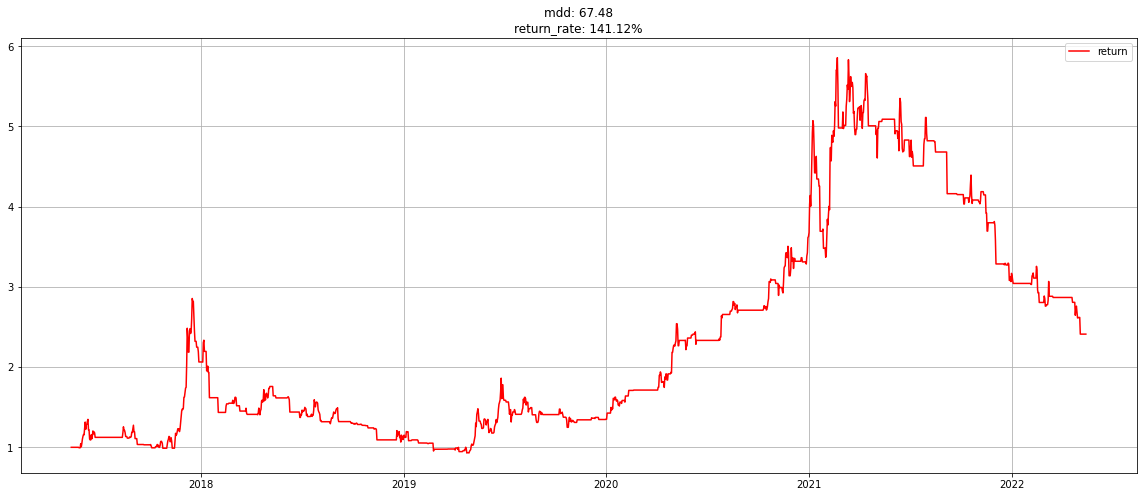

{'trade_rate': ' 30.14%', 'success_rate': ' 45.45%', 'pnl_rate': ' 0.71', 'mdd': ' 15.74%', 'cr': '-10.95%'}
{'trade_rate': ' 24.69%', 'success_rate': ' 30.00%', 'pnl_rate': ' 0.27', 'mdd': ' 20.56%', 'cr': '-22.69%'}
{'trade_rate': ' 54.36%', 'success_rate': ' 60.49%', 'pnl_rate': ' 1.31', 'mdd': ' 29.35%', 'cr': ' 33.19%'}
{'trade_rate': ' 67.71%', 'success_rate': ' 57.69%', 'pnl_rate': ' 1.51', 'mdd': ' 33.59%', 'cr': ' 97.21%'}


{'trade_rate': ' 38.85%',
 'success_rate': ' 52.88%',
 'pnl_rate': ' 1.15',
 'mdd': ' 67.48%',
 'cr': ' 141.12%'}

In [21]:
result_rsi = backtest_rsi(day100)
plot_return(result_rsi)

print(get_result_loss_1(result_rsi))
print(get_result_loss_2(result_rsi))
print(get_result_profit_1(result_rsi))
print(get_result_profit_2(result_rsi))
analysis_return(result_rsi)


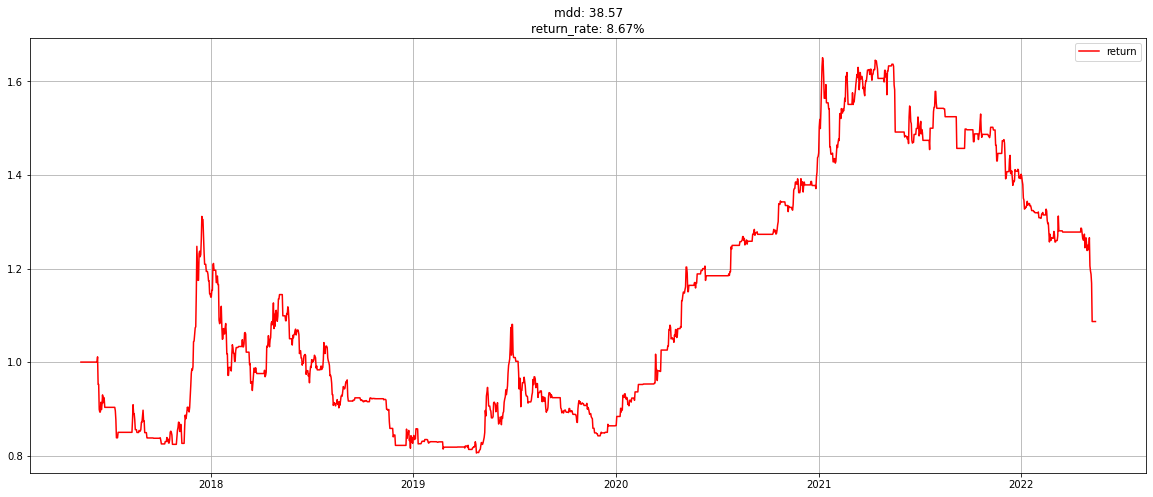

{'trade_rate': ' 45.21%', 'success_rate': ' 42.42%', 'pnl_rate': ' 0.66', 'mdd': ' 11.15%', 'cr': '-8.15%'}
{'trade_rate': ' 64.20%', 'success_rate': ' 46.15%', 'pnl_rate': ' 0.54', 'mdd': ' 11.39%', 'cr': '-10.65%'}
{'trade_rate': ' 56.38%', 'success_rate': ' 60.71%', 'pnl_rate': ' 1.28', 'mdd': ' 16.28%', 'cr': ' 13.28%'}
{'trade_rate': ' 71.35%', 'success_rate': ' 58.39%', 'pnl_rate': ' 1.54', 'mdd': ' 13.65%', 'cr': ' 27.78%'}


{'trade_rate': ' 51.09%',
 'success_rate': ' 51.98%',
 'pnl_rate': ' 1.04',
 'mdd': ' 38.57%',
 'cr': ' 8.67%'}

In [22]:
result_noise = backtest_noise(day100, df)
plot_return(result_noise)

print(get_result_loss_1(result_noise))
print(get_result_loss_2(result_noise))
print(get_result_profit_1(result_noise))
print(get_result_profit_2(result_noise))
analysis_return(result_noise)

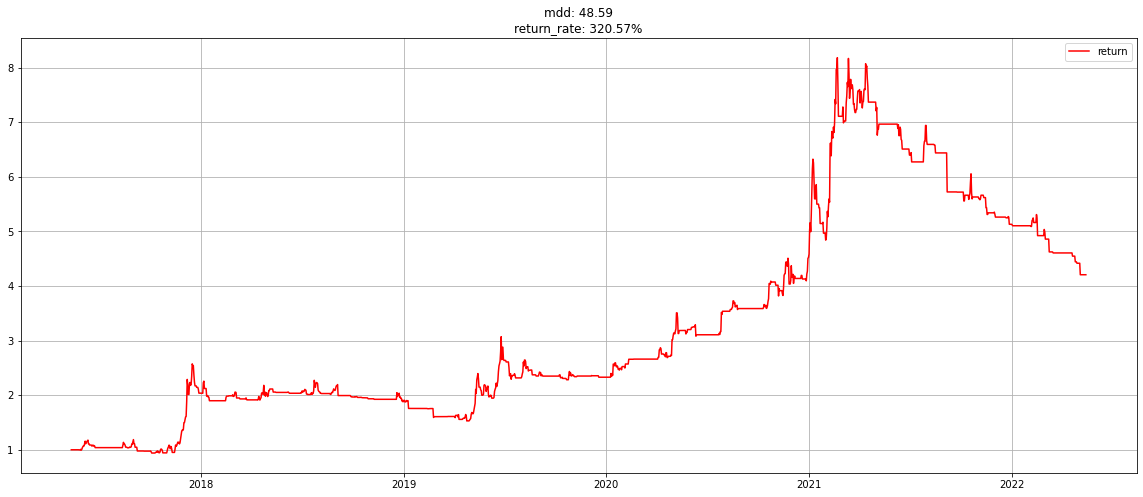

{'trade_rate': ' 15.07%', 'success_rate': ' 27.27%', 'pnl_rate': ' 0.28', 'mdd': ' 9.94%', 'cr': '-9.94%'}
{'trade_rate': ' 16.05%', 'success_rate': ' 23.08%', 'pnl_rate': ' 0.16', 'mdd': ' 4.90%', 'cr': '-6.33%'}
{'trade_rate': ' 54.36%', 'success_rate': ' 60.49%', 'pnl_rate': ' 1.35', 'mdd': ' 25.39%', 'cr': ' 33.95%'}
{'trade_rate': ' 67.71%', 'success_rate': ' 57.69%', 'pnl_rate': ' 1.64', 'mdd': ' 23.46%', 'cr': ' 113.46%'}


{'trade_rate': ' 35.85%',
 'success_rate': ' 52.74%',
 'pnl_rate': ' 1.28',
 'mdd': ' 48.59%',
 'cr': ' 320.57%'}

In [23]:
result_ma_rsi = backtest_ma_and_rsi(day100)
plot_return(result_ma_rsi)

print(get_result_loss_1(result_ma_rsi))
print(get_result_loss_2(result_ma_rsi))
print(get_result_profit_1(result_ma_rsi))
print(get_result_profit_2(result_ma_rsi))
analysis_return(result_ma_rsi)

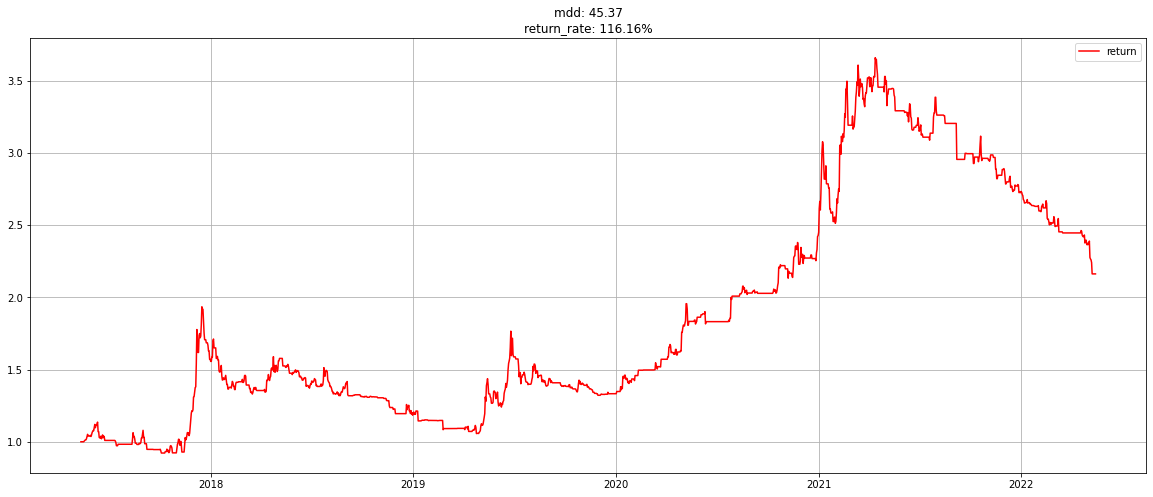

{'trade_rate': ' 45.21%', 'success_rate': ' 42.42%', 'pnl_rate': ' 0.54', 'mdd': ' 10.39%', 'cr': '-8.88%'}
{'trade_rate': ' 64.20%', 'success_rate': ' 46.15%', 'pnl_rate': ' 0.45', 'mdd': ' 10.28%', 'cr': '-10.17%'}
{'trade_rate': ' 56.38%', 'success_rate': ' 60.71%', 'pnl_rate': ' 1.34', 'mdd': ' 20.62%', 'cr': ' 26.06%'}
{'trade_rate': ' 71.35%', 'success_rate': ' 58.39%', 'pnl_rate': ' 1.66', 'mdd': ' 18.35%', 'cr': ' 74.77%'}


{'trade_rate': ' 52.40%',
 'success_rate': ' 52.45%',
 'pnl_rate': ' 1.16',
 'mdd': ' 45.37%',
 'cr': ' 116.16%'}

In [24]:
result_ma_noise = backtest_ma_and_noise(day100, df)
plot_return(result_ma_noise)

print(get_result_loss_1(result_ma_noise))
print(get_result_loss_2(result_ma_noise))
print(get_result_profit_1(result_ma_noise))
print(get_result_profit_2(result_ma_noise))
analysis_return(result_ma_noise)

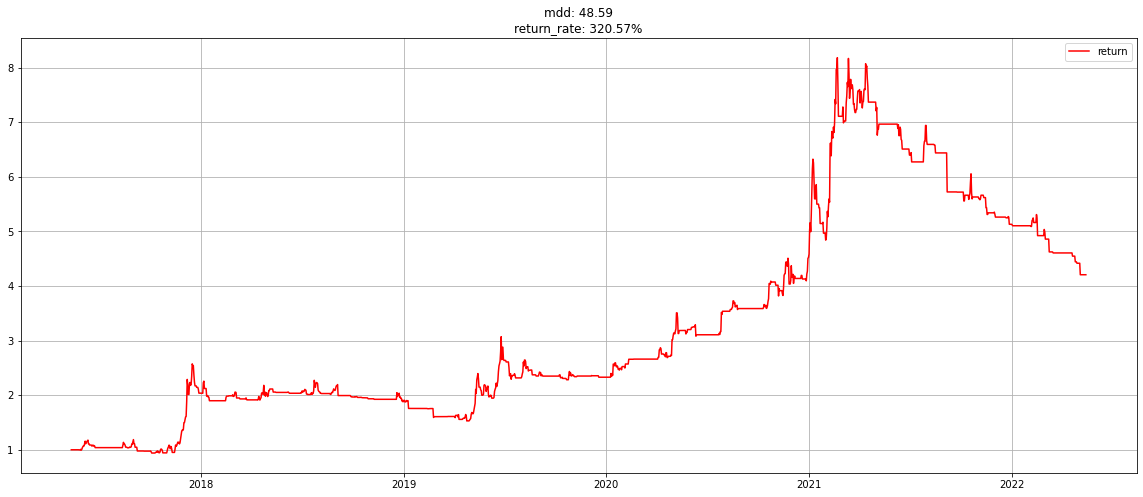

{'trade_rate': ' 30.14%', 'success_rate': ' 45.45%', 'pnl_rate': ' 0.79', 'mdd': ' 6.48%', 'cr': '-2.68%'}
{'trade_rate': ' 24.69%', 'success_rate': ' 30.00%', 'pnl_rate': ' 0.23', 'mdd': ' 7.83%', 'cr': '-8.78%'}
{'trade_rate': ' 54.36%', 'success_rate': ' 60.49%', 'pnl_rate': ' 1.22', 'mdd': ' 16.28%', 'cr': ' 10.11%'}
{'trade_rate': ' 67.71%', 'success_rate': ' 57.69%', 'pnl_rate': ' 1.50', 'mdd': ' 13.13%', 'cr': ' 24.88%'}


{'trade_rate': ' 37.98%',
 'success_rate': ' 52.66%',
 'pnl_rate': ' 1.13',
 'mdd': ' 27.05%',
 'cr': ' 47.64%'}

In [25]:
result_noise_rsi = backtest_noise_and_rsi(day100, df)
plot_return(result_ma_rsi)

print(get_result_loss_1(result_noise_rsi))
print(get_result_loss_2(result_noise_rsi))
print(get_result_profit_1(result_noise_rsi))
print(get_result_profit_2(result_noise_rsi))
analysis_return(result_noise_rsi)

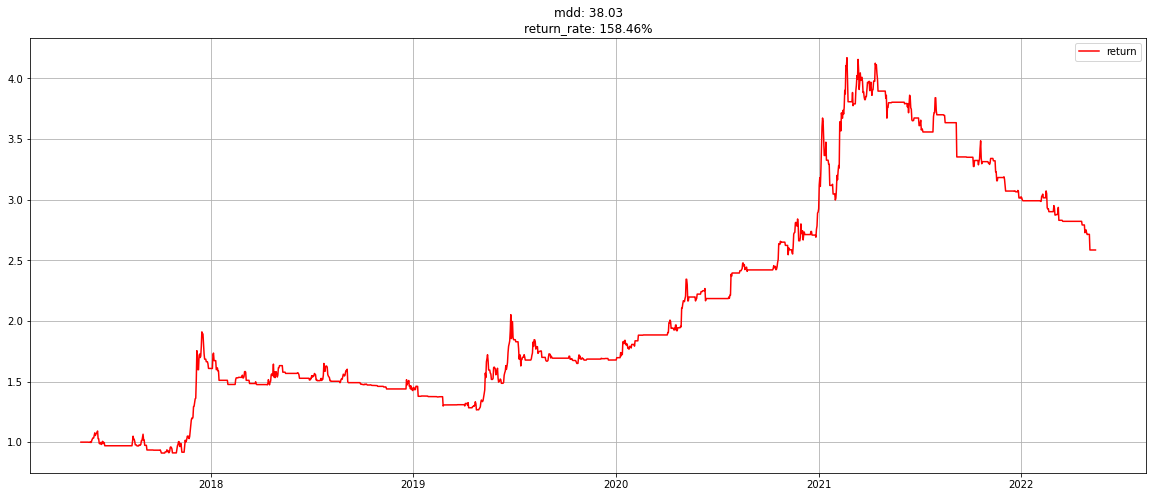

{'trade_rate': ' 30.14%', 'success_rate': ' 45.45%', 'pnl_rate': ' 0.52', 'mdd': ' 7.85%', 'cr': '-6.35%'}
{'trade_rate': ' 24.69%', 'success_rate': ' 30.00%', 'pnl_rate': ' 0.20', 'mdd': ' 6.36%', 'cr': '-7.55%'}
{'trade_rate': ' 54.36%', 'success_rate': ' 60.49%', 'pnl_rate': ' 1.31', 'mdd': ' 20.62%', 'cr': ' 22.28%'}
{'trade_rate': ' 67.71%', 'success_rate': ' 57.69%', 'pnl_rate': ' 1.60', 'mdd': ' 18.40%', 'cr': ' 65.07%'}


{'trade_rate': ' 38.85%',
 'success_rate': ' 52.88%',
 'pnl_rate': ' 1.22',
 'mdd': ' 38.03%',
 'cr': ' 158.46%'}

In [26]:
result_ma_noise_rsi = backtest_ma_and_rsi_and_noise(day100, df)
plot_return(result_ma_noise_rsi)

print(get_result_loss_1(result_ma_noise_rsi))
print(get_result_loss_2(result_ma_noise_rsi))
print(get_result_profit_1(result_ma_noise_rsi))
print(get_result_profit_2(result_ma_noise_rsi))
analysis_return(result_ma_noise_rsi)

In [ ]:
# from function import plot_result_save
# plot_result_save.plot_result(day100)